<center><h2> LOGIN DATA ANALYTICS

In [1]:
# import packages
import pandas as pd 
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
plt.style.use("ggplot")
from sklearn.metrics import *
plt.rcParams["figure.figsize"] = (15,5)
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

#### Read data into Pandas DataFrame

In [2]:
df = pd.read_csv("login data.csv")
df.head()

,FORESEE_RESPONDENT,FORESEE_SESSION_ID,DAY,SURVEY_CATEGORY,PRODUCT,PLATFORM,MAIN_TASK,CSAT,EFFORT,LOGIN,FORESEE_SESSION,EVENT_DATE,LOGIN_SUCCESS,EVNTS,LOGIN_EVNTS,LOGIN_ATTEMPTS,TWOFACTORAUTH,FORGOT_ID,FORGOT_PWD
0,YgsAQUdpoMRMh9BcoJwBEw4C,0037021d-7869-431f-a7df-eb4bc984f193,3/21/2022,Account Management,Wireless,Desktop,Check usage,77.78,3,Login Success-First Attempt,0037021d-7869-431f-a7df-eb4bc984f193,3/21/2022,1,16,5,2,1,0,0
1,EQcUwUopdcosddVFtZNZVw4C,004140f4-bd3b-4603-88f3-83b75b0c25e9,5/27/2022,Sales,Wireless,Desktop,Add a line to my current wireless service,51.85,4,Login Unsuccessful,004140f4-bd3b-4603-88f3-83b75b0c25e9,5/27/2022,0,18,7,3,1,0,0
2,Yk10xNphhA1x9108FItFlg4C,0084b056-c8cb-42f1-96d9-bb10e24ee7b3,6/20/2022,Support,Wireless,Desktop,"Voicemail help - setup, reset or troubleshoot ...",100.00,8,Login Success-First Attempt,0084b056-c8cb-42f1-96d9-bb10e24ee7b3,6/20/2022,0,13,7,2,1,0,0
3,BENct1p4VpdwYkA1ARUEUw4C,008535f1-fd9b-4c4c-b4b4-b9a8c9e3a0d1,2/15/2022,Account Management,Wireless,Desktop,"Add, change or downgrade plans and features (e...",74.07,4,Login Success-First Attempt,008535f1-fd9b-4c4c-b4b4-b9a8c9e3a0d1,2/15/2022,1,37,6,4,1,0,0
4,blWRyojK5rAckuyDBTfjkLFPcdDF21df,009a7653-3829-41e1-a11e-8a94f4c17b1d,6/17/2022,Support,BB,Mobile Web,Troubleshooting - fix a problem with my device...,0.00,1,Login Unsuccessful,009a7653-3829-41e1-a11e-8a94f4c17b1d,6/17/2022,-2,13,2,1,0,0,0


In [3]:
df['FORESEE_RESPONDENT'].value_counts().sort_values()

sZ4Y4Q0N1ZEUcJ0dt1VUAQ4C            1
wkUQAsFNAtIcMgcYhBdRBw4C            1
gY7F0hRv2ZQmRLBE9KTXGEsr423mvGkN    1
ZghN8U1txVghItgB40190Q4C            1
BoNN1BQxN8MRVNktRIol9A4C            1
                                   ..
BEIysS6ck5wA3vXGIePshohWvoX5PW4G    1
dyKHYBODIr0esP1WzO7JQAuYpEjo8XHd    2
oYhRpZtNYEdoBAhYUoJlEw4C            2
1YB0glF9NtZdxMMAk4QJcQ4C            2
d8RhdEhxdkMBYwVFkxllRw4C            2
Name: FORESEE_RESPONDENT, Length: 93595, dtype: int64

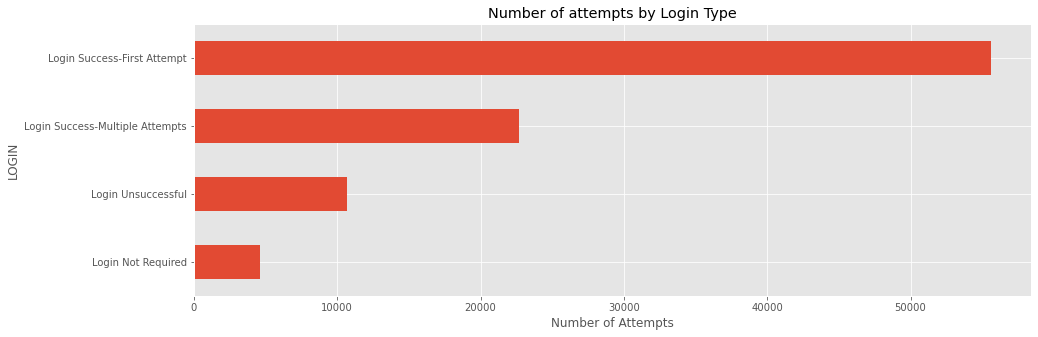

In [4]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(15,5))
plt.style.use('ggplot')

plt.title('Number of attempts by Login Type')
plt.xlabel('Number of Attempts')

df.groupby([df['LOGIN']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

#### Various LOGINs and CSAT score distribution

<AxesSubplot:xlabel='LOGIN', ylabel='CSAT'>

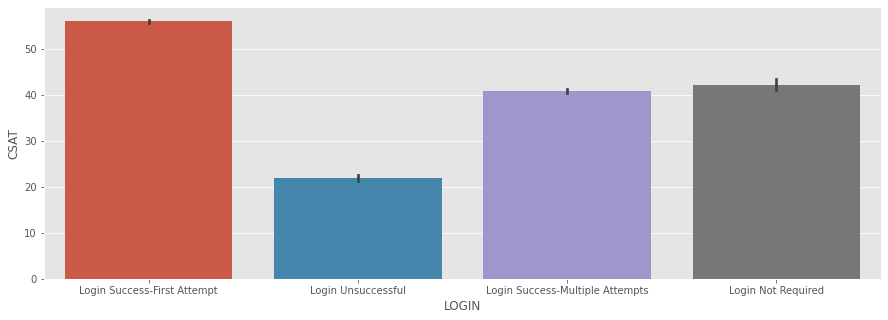

In [5]:
sns.barplot(x = 'LOGIN', y = 'CSAT', data = df)

#### Failed attempts and login type

In [6]:
df['Failed_attempts'] = df['LOGIN_ATTEMPTS'] - df['LOGIN_SUCCESS']

<AxesSubplot:xlabel='LOGIN', ylabel='Failed_attempts'>

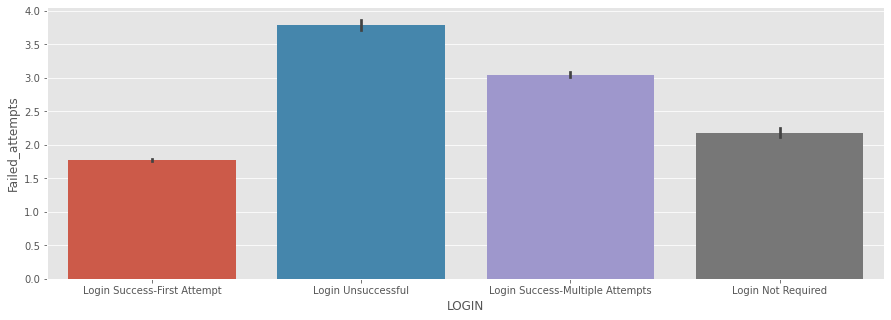

In [7]:
sns.barplot(x = 'LOGIN', y = 'Failed_attempts', data = df)

### Average falied attempts in each login type

#### Number of Login attempts repitition for different login types

In [8]:
ctab = pd.crosstab(df['LOGIN'],df['LOGIN_ATTEMPTS']).style.background_gradient(cmap='Reds')
display(ctab)

### Darker color means higher number

LOGIN_ATTEMPTS,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,45,48,49,50,54,55,56,83,88,105,118
LOGIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Login Not Required,1249,1679,772,383,186,122,67,54,24,27,14,5,7,9,1,2,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Login Success-First Attempt,12869,20230,14474,4143,1751,901,441,307,171,112,56,42,25,29,16,6,6,7,3,6,3,1,2,0,1,2,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Login Success-Multiple Attempts,4225,5502,4108,2641,1908,1407,857,669,430,283,165,141,83,90,44,30,27,13,15,12,9,5,6,4,4,5,3,1,1,2,2,2,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0
Login Unsuccessful,2055,3028,1346,1283,597,677,323,354,180,193,126,109,76,72,32,44,32,30,24,21,10,10,6,6,5,2,8,5,2,4,0,1,4,3,1,1,1,3,0,0,2,2,0,0,1,1,1,0,1,1,0,1,1


#### Login Success and Failed Attempts

In [9]:
ctab = pd.crosstab(df['LOGIN_SUCCESS'].astype(str),df['Failed_attempts']).style.background_gradient(cmap='Reds')
display(ctab)

Failed_attempts,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,42,43,44,48,49,54,56,83,88,105,118
LOGIN_SUCCESS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-2,0,0,0,5609,410,58,31,7,9,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,2817,4885,2736,1848,886,846,403,432,182,195,129,110,85,84,30,40,27,23,22,23,9,12,9,9,7,4,7,3,2,3,2,3,1,2,0,1,2,2,0,2,2,0,1,1,1,1,1,1,1,1
1,11972,25144,17906,6571,3549,2252,1281,950,622,420,232,187,106,116,63,42,39,28,20,16,13,6,5,1,3,5,6,4,1,3,0,0,3,2,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0,0


## Two factor authertication

#### Count of two factor authentication

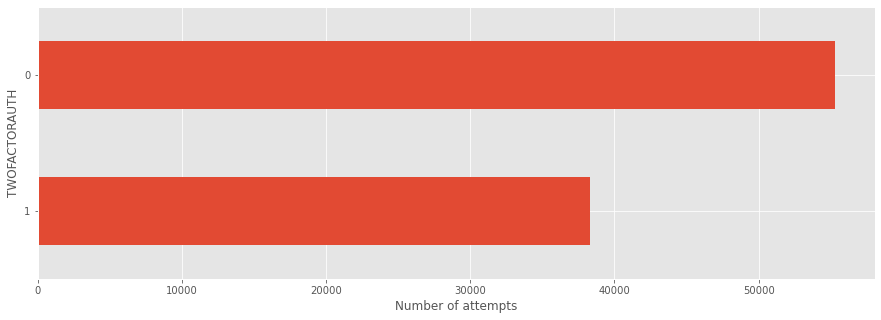

In [10]:
df.groupby([df['TWOFACTORAUTH']]).size().sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Number of attempts")
plt.show()

#### Login attempts with 2 factor authentication

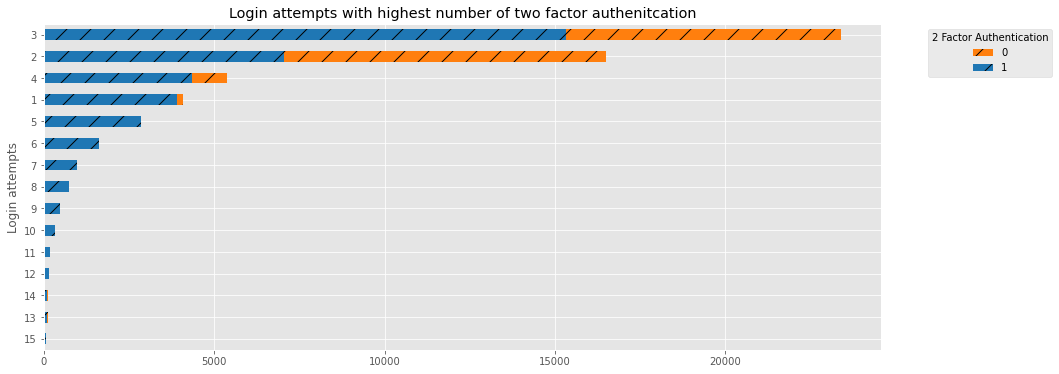

In [11]:
plt.figure(figsize=(15,6))
colors = {1:'tab:blue', 0:'tab:orange'}

grouped = df.groupby('TWOFACTORAUTH')
for key, group in grouped:
    group['LOGIN_ATTEMPTS'].astype(str).value_counts().sort_values()[-15:].plot(kind = 'barh', color=colors[key], label=key, hatch = '/')
    plt.legend(title='2 Factor Authentication', bbox_to_anchor=(1.05, 1), loc='upper left', )
    plt.ylabel("Login attempts")
    plt.title("Login attempts with highest number of two factor authenitcation")

#### Login Events and 2 factor authentication

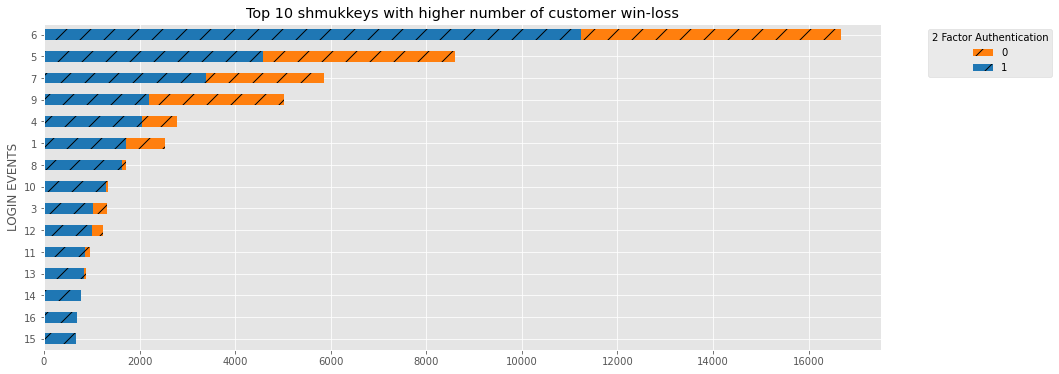

In [12]:
plt.figure(figsize=(15,6))
colors = {1:'tab:blue', 0:'tab:orange'}

grouped = df.groupby('TWOFACTORAUTH')
for key, group in grouped:
    group['LOGIN_EVNTS'].astype(str).value_counts().sort_values()[-15:].plot(kind = 'barh', color=colors[key], label=key, hatch = '/')
    plt.legend(title='2 Factor Authentication', bbox_to_anchor=(1.05, 1), loc='upper left', )
    plt.ylabel("LOGIN EVENTS")

    plt.title("Top 10 shmukkeys with higher number of customer win-loss")

#### CSAT and Two factor authentication

<AxesSubplot:xlabel='TWOFACTORAUTH', ylabel='CSAT'>

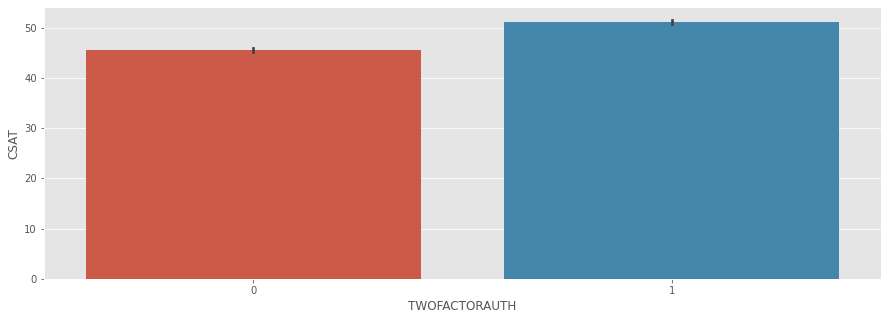

In [13]:
sns.barplot(x = 'TWOFACTORAUTH', y = 'CSAT', data = df)

#### Main Task and Two factor authentication

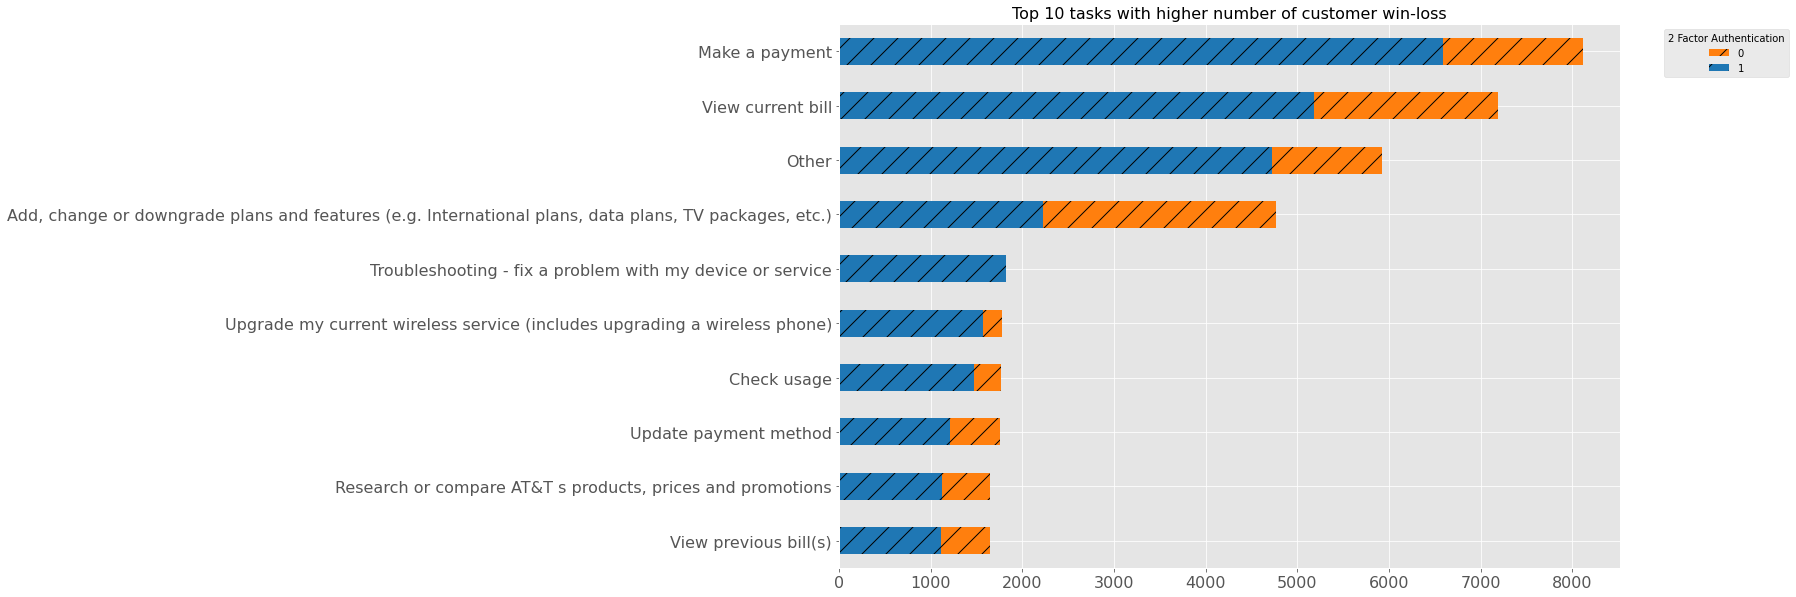

In [14]:
plt.figure(figsize=(14,10))
colors = {1:'tab:blue', 0:'tab:orange'}

grouped = df.groupby('TWOFACTORAUTH')
for key, group in grouped:
    group['MAIN_TASK'].value_counts().sort_values()[-10:].plot(kind = 'barh', color=colors[key], label=key, hatch = '/')
    plt.legend(title='2 Factor Authentication', bbox_to_anchor=(1.05, 1), loc='upper left', )
    plt.title("Top 10 tasks with higher number of customer win-loss", fontsize = 16)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16);

__Inference:__ This plot shows that majority of tasks required Two factor authentication from Customers.

### Top 10 most repetitive tasks performed by customers and CSAT score

In [15]:
main_task = list(df['MAIN_TASK'].value_counts().sort_values()[-10:].index)

main_task = df[df["MAIN_TASK"].isin(main_task)]

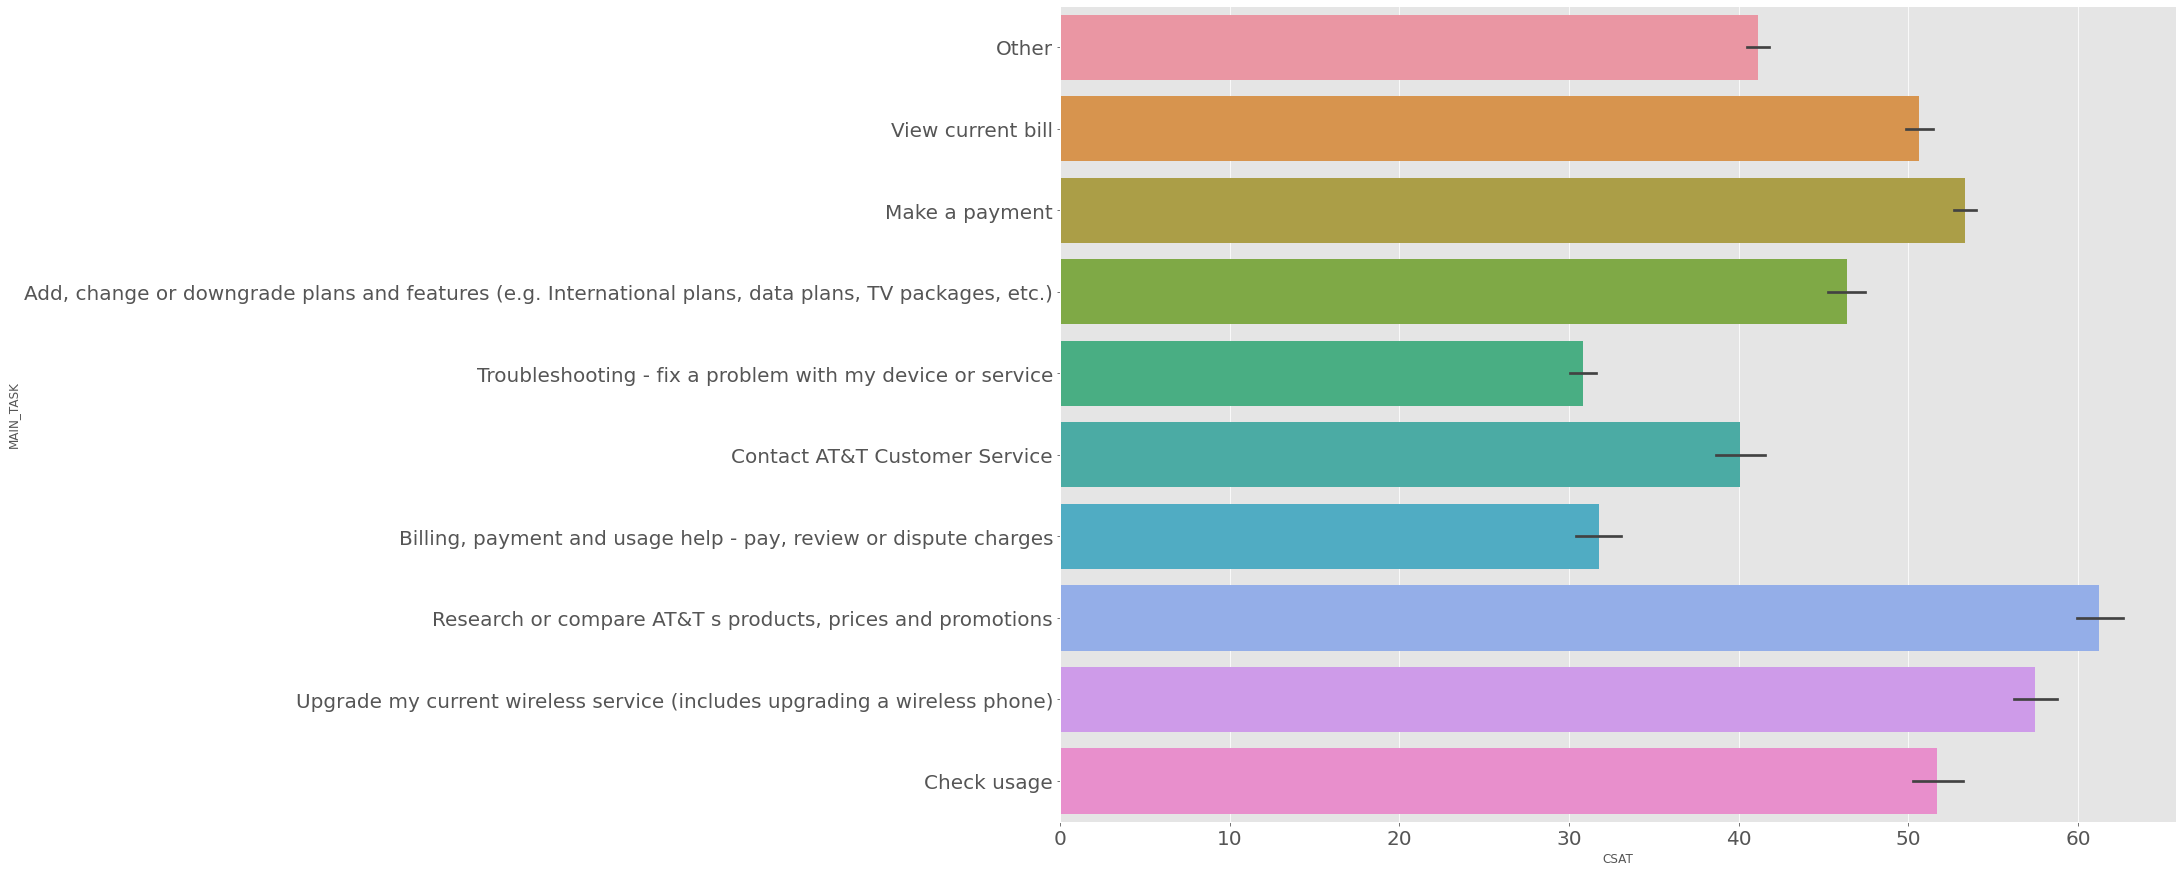

In [16]:
plt.figure(figsize=(20,15))

sns.barplot(y = 'MAIN_TASK', x = 'CSAT', data = main_task.sort_values(by = 'CSAT'), orient = 'horizontal')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

#### Most repitative tasks and ratio of login success

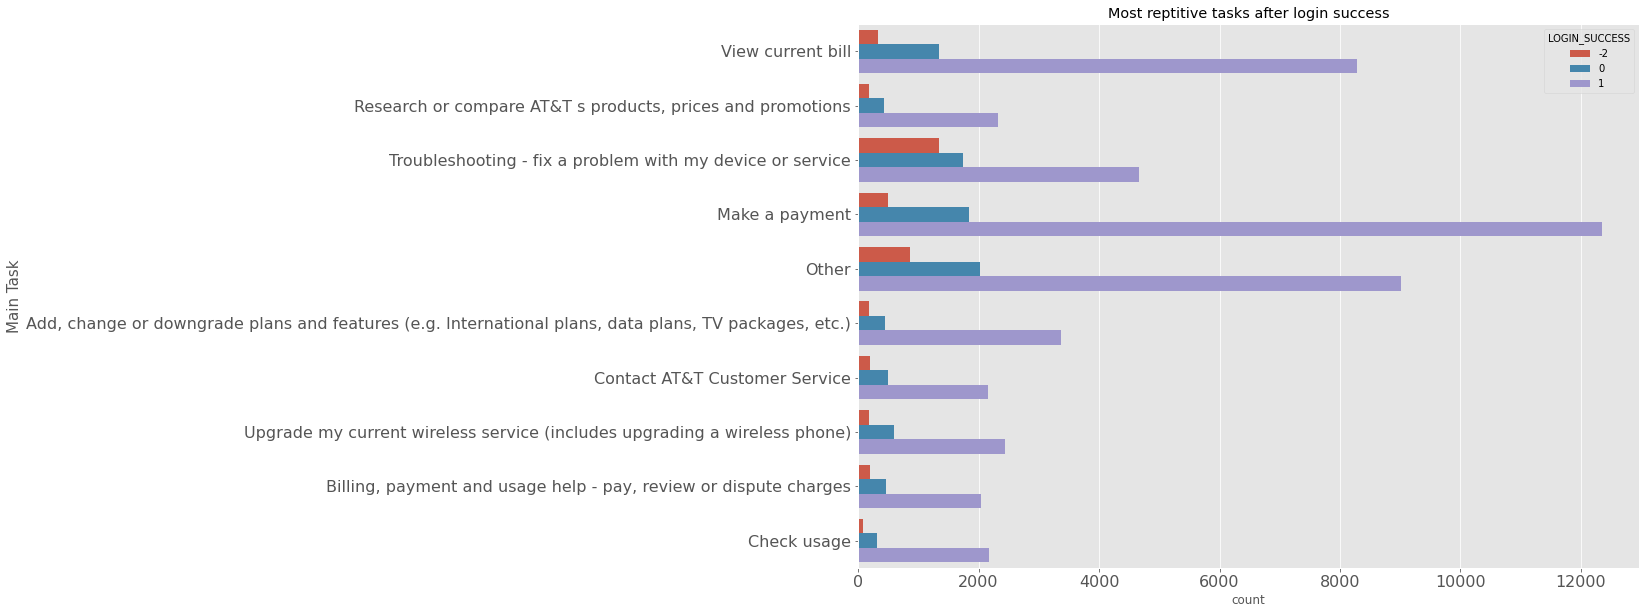

In [17]:
plt.figure(figsize=(14,10))

tasks_10 = list(df.groupby([df['MAIN_TASK']]).size().sort_values(ascending=False)[:10].index)
top_10T = df.loc[df['MAIN_TASK'].isin(tasks_10)]

sns.countplot(y = 'MAIN_TASK', hue = 'LOGIN_SUCCESS', data = top_10T.sort_values(by = 'LOGIN_SUCCESS'))
plt.ylabel("Main Task", fontsize = 15)
plt.title("Most reptitive tasks after login success")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);

#### Login attempts and forgot ID

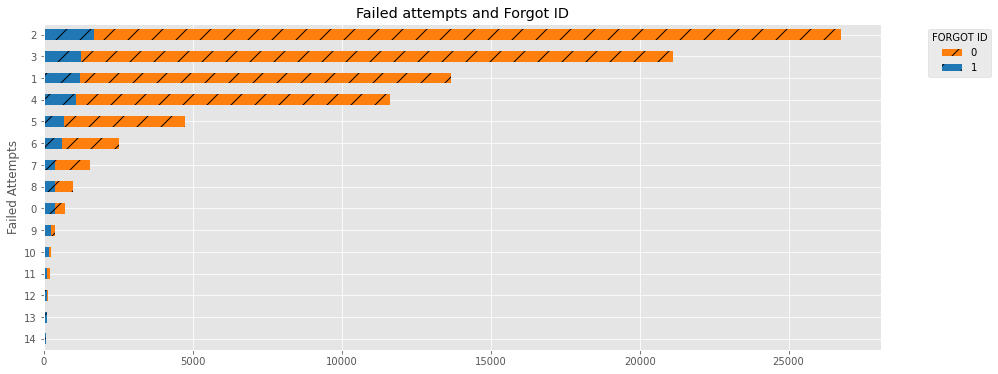

In [18]:

plt.figure(figsize=(15,6))
colors = {1:'tab:blue', 0:'tab:orange'}

grouped = df.groupby('FORGOT_ID')
for key, group in grouped:
    group['Failed_attempts'].astype(str).value_counts().sort_values()[-15:].plot(kind = 'barh', color=colors[key], label=key, hatch = '/')
    plt.legend(title='FORGOT ID', bbox_to_anchor=(1.05, 1), loc='upper left', )
    plt.ylabel("Failed Attempts")
    plt.title("Failed attempts and Forgot ID")

__Inference:__ According to the above data, only a small proportion of failed attempts were the result of customer ID loss.

#### Failed Attempts and forgot password

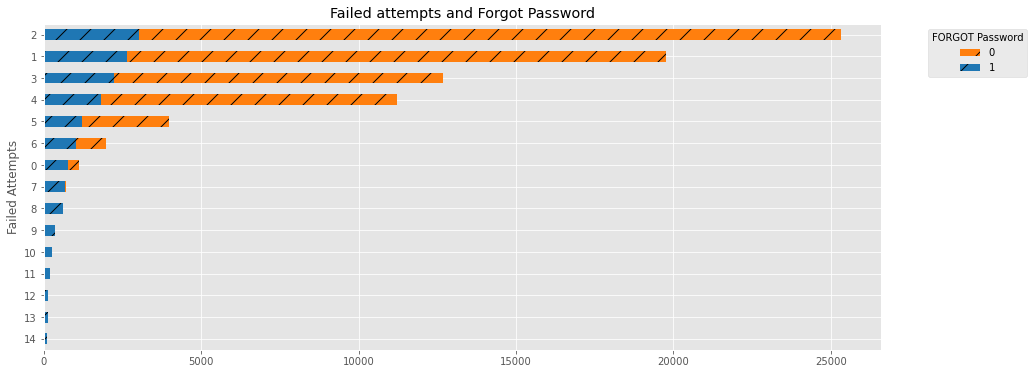

In [19]:

plt.figure(figsize=(15,6))
colors = {1:'tab:blue', 0:'tab:orange'}

grouped = df.groupby('FORGOT_PWD')
for key, group in grouped:
    group['Failed_attempts'].astype(str).value_counts().sort_values()[-15:].plot(kind = 'barh', color=colors[key], label=key, hatch = '/')
    plt.legend(title='FORGOT Password', bbox_to_anchor=(1.05, 1), loc='upper left', )
    plt.ylabel("Failed Attempts")
    plt.title("Failed attempts and Forgot Password")

__Inference:__ The data shows that a higher percentage of failed attempts result from forgotten passwords as compared to forgotten IDs.

#### Most repeating tasks and frequency of password loss

In [20]:
df[['MAIN_TASK', "PRODUCT", 'FORGOT_PWD']].groupby(['PRODUCT', 'MAIN_TASK'])[['FORGOT_PWD']].sum().sort_values(by = 'FORGOT_PWD', ascending=False).head(50).style.background_gradient(cmap='Reds')


In [21]:
df[['MAIN_TASK', "PLATFORM", 'FORGOT_PWD']].groupby(['PLATFORM', 'MAIN_TASK'])[['FORGOT_PWD']].sum().sort_values(by = 'FORGOT_PWD', ascending=False).head(50).style.background_gradient(cmap='Reds')


__Inference:__ The above results show the frquence of forgot passsowrd for different tasks and customers coming from different products and platoforms.

<center><h2> THE END